In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
path = "https://raw.githubusercontent.com/Mondol007/Datasets/main/Breast_cancer_data.csv"
dataset = pd.read_csv(path)
dataset.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [ ]:
dataset.shape

(569, 6)

In [ ]:
#1st
class Perceptron1:
    def __init__(self, num_inputs, learning_rate=0.001):
        self.weights = np.zeros(num_inputs)
        self.threshold = 0
        self.learning_rate = learning_rate

    def predict(self, inputs):
        activation = np.dot(self.weights, inputs) - self.threshold
        return 1 if activation > 0 else 0

    def train(self, inputs, desired_output):
        prediction = self.predict(inputs)

        if prediction == desired_output:
            return  # No update needed if the prediction is correct

        if desired_output == 1:
            self.weights += inputs
        else:
            self.weights -= inputs

In [ ]:
#2nd
#Perceptron block

class Perceptron2:
    def __init__(self, num_inputs, learning_rate=0.001):
        self.weights = np.zeros(num_inputs)
        self.threshold = 0
        self.learning_rate = learning_rate

    def predict(self, inputs):
        activation = np.dot(self.weights, inputs) - self.threshold
        return 1 if activation > 0 else 0

    def train(self, inputs, desired_output):
        prediction = self.predict(inputs)

        if prediction == desired_output:
            return  # No update needed if the prediction is correct

        if desired_output == 1:
            self.weights += self.learning_rate * inputs
            self.threshold -= self.learning_rate
        else:
            self.weights -= self.learning_rate * inputs
            self.threshold += self.learning_rate

In [ ]:
#3rd

class Perceptron3:
    def __init__(self, num_inputs, learning_rate=0.001):
        self.weights = np.zeros(num_inputs)
        self.threshold = 0
        self.learning_rate = learning_rate

    def predict(self, inputs):
        activation = np.dot(self.weights, inputs) - self.threshold
        return 1 if activation > 0 else 0

    def train(self, inputs, desired_output):
        prediction = self.predict(inputs)
        delta = desired_output - prediction

        self.weights += self.learning_rate * delta * inputs


<Axes: >

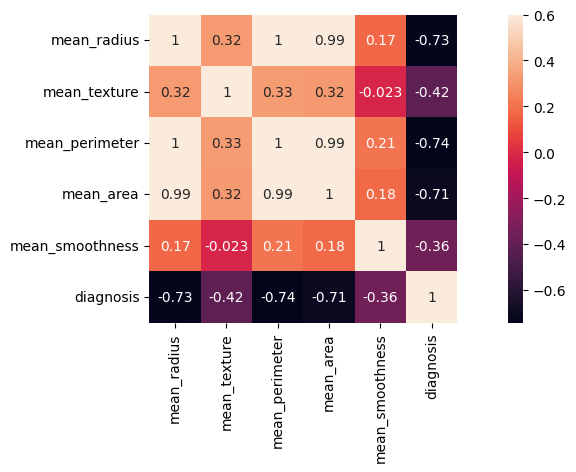

In [ ]:
#Correlation Matrix

plt.figure(figsize=(13,4))
sns.heatmap(dataset.corr(), vmax=0.6, square=True, annot=True)

In [ ]:
dataset.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [ ]:
#For dropping 'mean_perimeter' & 'mean_area'

#dataset = dataset.drop(['mean_perimeter', 'mean_area'], axis=1)

In [ ]:
train, test = train_test_split(dataset, test_size=.2, random_state=41)
X_train = train.iloc[:,:-1].values
Y_train = train.iloc[:,-1].values
X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(455, 5)
(455,)
(114, 5)
(114,)


Regular Method

In [ ]:
#prediction for the first

# Initialize and train the Perceptron
num_features = X_train.shape[1]
perceptron_1 = Perceptron1(num_features, learning_rate=0.1)

for _ in range(5):  # Training for 100 epochs
    for inputs, desired_output in zip(X_train, Y_train):
        perceptron_1.train(inputs, desired_output)

# Testing the trained perceptron on the test set
y_pred_1 = [perceptron_1.predict(inputs) for inputs in X_test]

In [ ]:
# Calculate accuracy for the first
accuracy = accuracy_score(Y_test, y_pred_1)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 88.60%


In [ ]:
cnf_matrix = confusion_matrix(Y_test, y_pred_1)

<Axes: >

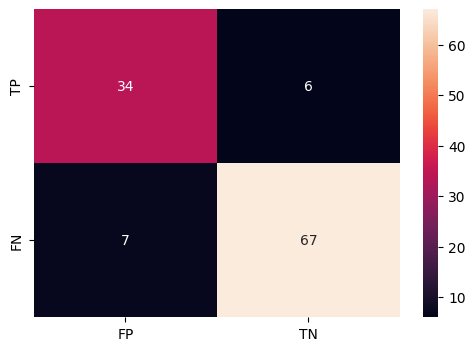

In [ ]:
import seaborn as sns
true_class_names = ['TP', 'FN']
predicted_class_names = ['FP', 'TN']

df_cnf_matrix = pd.DataFrame(cnf_matrix,
                             index = true_class_names,
                             columns = predicted_class_names)

plt.figure(figsize = (13,4))

plt.subplot(121)
sns.heatmap(df_cnf_matrix, annot=True, fmt='d')

1st Way

In [ ]:
#prediction for the second

# Initialize and train the Perceptron
num_features = X_train.shape[1]
perceptron_2 = Perceptron2(num_features, learning_rate=0.1)

for _ in range(5):  # Training for 100 epochs
    for inputs, desired_output in zip(X_train, Y_train):
        perceptron_2.train(inputs, desired_output)

# Testing the trained perceptron on the test set
y_pred_2 = [perceptron_2.predict(inputs) for inputs in X_test]

In [ ]:
# Calculate accuracy for the first
accuracy = accuracy_score(Y_test, y_pred_2)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 88.60%


In [ ]:
cnf_matrix = confusion_matrix(Y_test, y_pred_2)

<Axes: >

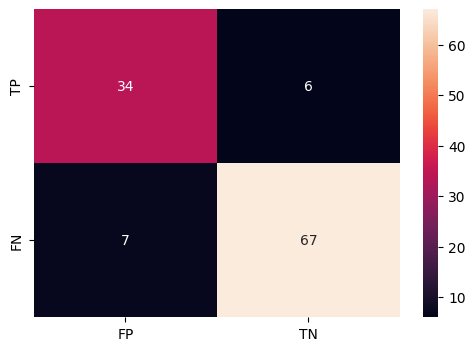

In [ ]:
import seaborn as sns
true_class_names = ['TP', 'FN']
predicted_class_names = ['FP', 'TN']

df_cnf_matrix = pd.DataFrame(cnf_matrix,
                             index = true_class_names,
                             columns = predicted_class_names)

plt.figure(figsize = (13,4))

plt.subplot(121)
sns.heatmap(df_cnf_matrix, annot=True, fmt='d')

2nd Way

In [ ]:
#prediction for the third

# Initialize and train the Perceptron
num_features = X_train.shape[1]
perceptron_3 = Perceptron3(num_features, learning_rate=0.1)

for _ in range(10):  # Training for 100 epochs
    for inputs, desired_output in zip(X_train, Y_train):
        perceptron_3.train(inputs, desired_output)

# Testing the trained perceptron on the test set
y_pred_3 = [perceptron_3.predict(inputs) for inputs in X_test]

In [ ]:
# Calculate accuracy for the first
accuracy = accuracy_score(Y_test, y_pred_3)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 89.47%


In [ ]:
cnf_matrix = confusion_matrix(Y_test, y_pred_3)

<Axes: >

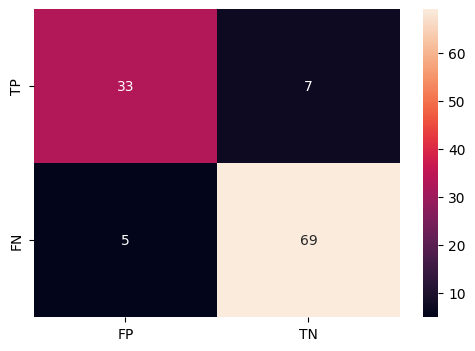

In [ ]:
import seaborn as sns
true_class_names = ['TP', 'FN']
predicted_class_names = ['FP', 'TN']

df_cnf_matrix = pd.DataFrame(cnf_matrix,
                             index = true_class_names,
                             columns = predicted_class_names)

plt.figure(figsize = (13,4))

plt.subplot(121)
sns.heatmap(df_cnf_matrix, annot=True, fmt='d')